# Task 1
# Dataset - Sales Data

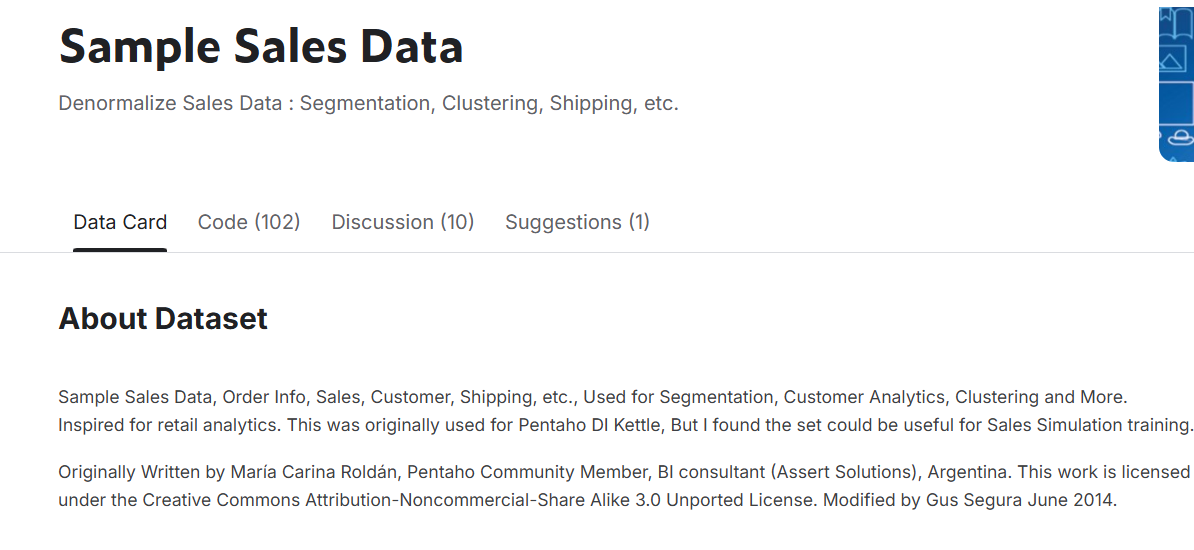

In [11]:
from IPython.display import display
from PIL import Image

image = Image.open(r"C:\Users\arpan.000\OneDrive\Pictures\Screenshots\Screenshot 2025-04-07 112954.png")
display(image)


In [13]:
# importing relevant packages
import pandas as pd
import numpy as np

In [17]:
df = pd.read_excel('sales_data_sample.xlsx')
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-07-05 00:00:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-01-07 00:00:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10 00:00:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [20]:
# Inspecting the dimension of the dataset
df.shape

(2823, 25)

### It contains 25 columns and 2823 rows

In [24]:
# Some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


### From the above information we can understand there are missing values present in the dataset

In [27]:
# Let's count the exact number of missing values
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

### No. of missing values
+ Addressline 2 - 2521
+ STATE - 1486
+ TERRITORY - 1074

### The columns of missing values are categorical and the percentage is around 40% to 50%. So it's better to remove the columns as they can distort the analysis

In [34]:
# deleting the columns
df = df.drop(columns = ['ADDRESSLINE2', 'STATE', 'TERRITORY'])

In [36]:
df.shape

(2823, 22)

## What are missing values and how do you handle them?

Ans) Missing values are the missing data present in a particular column of a dataset. Missing values can be handled either by removing them or replacing them with calculated values derived by statistical methods. 
+ If the missing values are below 20% we can impute them with mean, median and mode where mean and median are for numerical columns and mode is for categorical columns
+ We can replace the missing values with mean only if the distribution has minimum outliers else we have to use the median
+ If it's 20% to 30% and the columns are essential then we can impute or else remove
+ If more than that then its preferable to remove the column

In [53]:
# Inspecting for duplicate value
df.duplicated().value_counts()

False    2823
Name: count, dtype: int64

## How do you treat duplicate records?

Ans) To treat duplicate records we can remove them with df.drop_duplicates() function in pandas. But in some cases, duplicates are important, for example in a classification problem if we remove the duplicates of 0's and 1's then it will destroy the whole idea of analysing the dataset.
+ In the above the dataset there are no duplicate records

## Difference between dropna() and fillna() in Pandas
+ dropna() removes data, potentially reducing the size of the dataframe, while fillna() replace missing values and keeps the dataframe size same
+ dropna() is suitable when missing values make the data unreliable, while fillna() works well if you estimate values or retain data continuity with imputation

## Standardizing the Data

In [70]:
# Converting the column names into lower case
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'CITY', 'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'DEALSIZE'],
      dtype='object')

In [72]:
df.columns = df.columns.str.lower()

In [74]:
df.columns

Index(['ordernumber', 'quantityordered', 'priceeach', 'orderlinenumber',
       'sales', 'orderdate', 'status', 'qtr_id', 'month_id', 'year_id',
       'productline', 'msrp', 'productcode', 'customername', 'phone',
       'addressline1', 'city', 'postalcode', 'country', 'contactlastname',
       'contactfirstname', 'dealsize'],
      dtype='object')

In [78]:
df['country'].value_counts()

country
USA            1004
Spain           342
France          314
Australia       185
UK              144
Italy           113
Finland          92
Norway           85
Singapore        79
Canada           70
Denmark          63
Germany          62
Sweden           57
Austria          55
Japan            52
Belgium          33
Switzerland      31
Philippines      26
Ireland          16
Name: count, dtype: int64

In [80]:
df['status'].value_counts()

status
Shipped       2617
Cancelled       60
Resolved        47
On Hold         44
In Process      41
Disputed        14
Name: count, dtype: int64

## Orderdate format conversion

In [82]:
# converting the order date into datetime and the format in dd-mm-yyyy

# Convert to datetime format
df["orderdate"] = pd.to_datetime(df["orderdate"])

# Format the date as dd-mm-yyyy
df["orderdate"] = df["orderdate"].dt.strftime("%d-%m-%Y")

In [84]:
df['orderdate']

0       24-02-2003
1       05-07-2003
2       07-01-2003
3       25-08-2003
4       10-10-2003
           ...    
2818    12-02-2004
2819    31-01-2005
2820    03-01-2005
2821    28-03-2005
2822    05-06-2005
Name: orderdate, Length: 2823, dtype: object

In [88]:
# Now as we have exact dates we can remove 'qtr_id', 'month_id', 'year_id'
df = df.drop(columns = ['qtr_id', 'month_id', 'year_id'])

In [90]:
df.shape

(2823, 19)

## Outlier detection and treatment
It can be done through:
+ Z-score method
+ IQR
+ DBSCAN - Clustering outliers separately
  
Here, we will use IQR method (Inter quartile range)

In [98]:
# Outlier detection thorugh boxplot
import seaborn as sns

<Axes: >

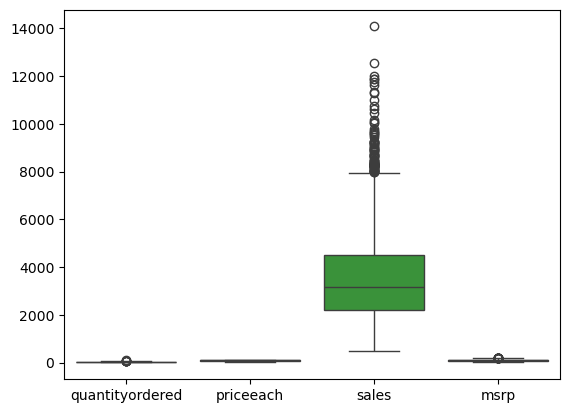

In [104]:
sns.boxplot(data = df[['quantityordered', 'priceeach', 'sales', 'msrp']])

### Replacing outliers with median

In [113]:
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = df[column].median()
    df[column] = df[column].apply(lambda x:median if x>upper_bound or x<lower_bound else x)
    return df

In [115]:
col = ['quantityordered', 'priceeach', 'sales', 'msrp']
for c in col:
    df = replace_outliers_with_median(df, c)

### Maximum Outliers have been removed

<Axes: >

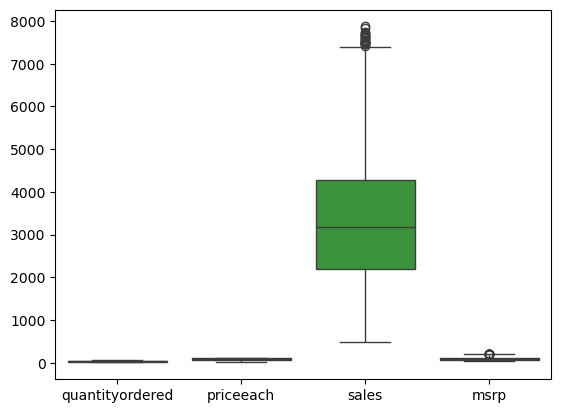

In [122]:
sns.boxplot(data = df[['quantityordered', 'priceeach', 'sales', 'msrp']])

## Cleaned Dataset

In [126]:
df.to_excel("Cleaned_dataset.xlsx", index=False)

## What are common data cleaning challenges?

Missing Data

+ Problem: Some values are missing (NaN or NULL).

+ Solution: Fill with mean/median/mode, interpolate, or drop missing rows/columns.

Duplicate Records

+ Problem: The dataset contains repeated entries.

+ Solution: Use .drop_duplicates() in Pandas to remove them.

Inconsistent Formatting

+ Problem: Inconsistent text cases ("apple" vs. "Apple"), date formats ("04/07/2025" vs. "07-04-2025").

+ Solution: Standardize text (lowercase, trim spaces), and convert dates to a uniform format.

Outliers

+ Problem: Extreme values can skew analysis.

+ Solution: Use IQR or Z-score to detect and replace them with median/mean.

Incorrect Data Types

+ Problem: Numeric data stored as text ("1000" as "string").

+ Solution: Convert using .astype(int), pd.to_numeric(), or pd.to_datetime().

Inconsistent Categorical Values

+ Problem: Different spellings for the same category ("NY" vs. "New York", "M" vs. "Male").

+ Solution: Standardize categories using mapping (df["column"].replace({...})).

Whitespace & Special Characters

+ Problem: Unnecessary spaces (" New York " vs. "New York") or unwanted symbols ("$1000").

+ Solution: Use .strip(), .replace(), or regular expressions (re.sub()).

Typos & Spelling Errors

+ Problem: Misspelled words ("reciept" instead of "receipt").

+ Solution: Use spelling correction libraries like TextBlob or FuzzyWuzzy.

Merging Issues (Data Inconsistency)

+ Problem: Different column names across datasets ("Customer ID" vs. "Cust_ID").

+ Solution: Rename columns for consistency before merging (df.rename(columns={...})).

Data Entry Errors

+ Problem: Wrong values due to human error (e.g., "Age = -5", "Salary = 99999999999").

+ Solution: Set validation rules and filter out invalid data.

 ## How can you check data quality?

 + Check for Missing Values
 + Check for Duplicate Data
 + Check for Outliers
 +  Verify Data Consistency
 +  Identify Unexpected Values or Errors
 +  Check for Inconsistent Date Formats